# **Project Name**    - Yulu Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Accurately predicting bike demand is a critical challenge for bike rental companies, as it enables them to optimize inventory and pricing strategies. In this project, I aim to develop a **supervised machine learning regression model** to forecast bike rental demand for specific time periods.

The dataset used for this project originates from a bike-sharing company and includes detailed information on bike rentals, such as the number of bikes rented, the rental time and date, and various weather and seasonality features. Additionally, the dataset contains information on other relevant factors that could impact bike demand, including holidays and whether the day is a functioning or non-functioning day.

After cleaning and preprocessing the data, I split it into training and test sets. The training data was used to train multiple machine learning models. I experimented with various model architectures and hyperparameter settings, ultimately selecting the model that demonstrated the best performance on the test data.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the evolving landscape of urban mobility, companies like Yulu Bike are at the forefront of providing efficient and eco-friendly transportation solutions. Accurate prediction of bike-sharing demand is crucial for optimizing fleet management, enhancing customer satisfaction, and maximizing operational efficiency. By analyzing data related to bike-sharing demand, Yulu Bike aims to gain a deeper understanding of the factors influencing bike rentals. The dataset includes a range of variables such as weather conditions, time of day, and special events, which impact bike usage patterns.

Leveraging this data, Yulu Bike can:

1. **Optimize Fleet Management :**  Predicting demand based on factors like temperature, humidity, and time of day allows Yulu Bike to deploy bikes more strategically, ensuring availability during peak times and reducing idle resources.

2. **Enhance Customer Experience :** By understanding how external factors such as weather and holidays affect demand, Yulu Bike can better align their service offerings with customer needs, improving overall user satisfaction.

3. **Improve Operational Efficiency :** Accurate demand forecasts help in planning maintenance schedules and managing bike distribution across different areas, leading to more efficient operations.

4. **Adapt to Environmental Factors :** Insights into how weather conditions and seasonal variations impact bike usage enable Yulu Bike to adjust their strategies in real-time, ensuring optimal service delivery throughout the year.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Importing Libraries

#Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

"""
from sci-kit library scaling, transforming and labeling functions are brought
which is used to change raw feature vectors into a representation that is more
suitable for the downstream estimators.
"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [98]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Loading Dataset
bike_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike sharing demand data/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [100]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [101]:
# Dataset Rows & Columns count
print('Rows :',bike_df.shape[0])
print('Columns :',bike_df.shape[1])

Rows : 8760
Columns : 14


### Dataset Information

In [102]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [103]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [104]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


<Axes: >

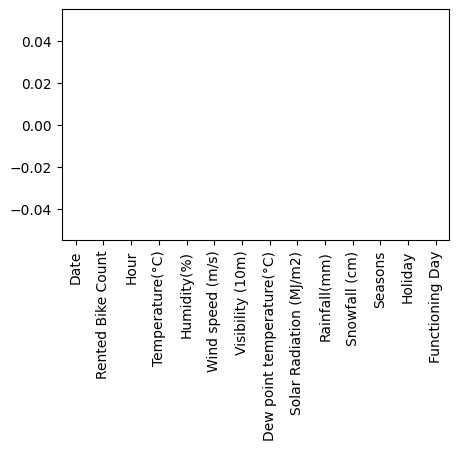

In [105]:
# Visualizing the missing values
plt.figure(figsize=(5,3))
bike_df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

1. ***Dataset has 8760 observations and 14 features.***
2. ***Dataset contains hourly information for a year making it 8760 hours of information which represents the number of rows in the dataset.***
3. ***The dataset contains no duplicate vvalues that means all the values in the dataset are unique.***
4. ***There are no null or missing values.***
5. ***Date has object datatype, it should be datetyme datatype.***

## ***2. Understanding Your Variables***

In [106]:
# Dataset Columns
print('Dataset Features :')
bike_df.columns

Dataset Features :


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [107]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

**Date:** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count:** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s):** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** *Season of the year, type : str, there are only 4 season's in data *.

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [108]:
# Checking Unique Values for each variable.
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

1. ***In the above data after counting the missing and duplicate value we came to know that there are no missing and duplicate value present.***
2. ***Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it doesn't affect our end results.***

In [109]:
# Renaming the columns to appropriate names
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

***Date column has an object type basically python reads it as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***

In [110]:
# Changing the date datatype as datetime
bike_df['Date'] = bike_df['Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))

In [111]:
# Changing the "Date" column into three "year","month","day" column
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [112]:
# Creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekday_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )  # 1 if weekend and 0 if weekday

bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [113]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int32  
 14  weekday_weekend        8760 non-null   int64  
dtypes: f

In [114]:
bike_df['weekday_weekend'].value_counts()

,count
weekday_weekend,
0,6264
1,2496


***The columns "hour," "month," and "weekday_weekend" are currently represented as integer data types, but they should actually be categorized as categorical data types. If we don't change their data types, any further analysis and correlation might produce misleading results, as the values would not be interpreted correctly. Therefore, it is crucial to convert these columns to categorical data types to ensure accurate analysis and avoid potential misinterpretations.***

In [115]:
#Changing the int64 column into catagory column
cols=['Hour','month','weekday_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

### What all manipulations have you done and insights you found?

1. ***Converted the datatype of Date column to datetime.***
2. ***Created 3 new columns year, month, day using Date column.***
3. ***Since we need the information if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.***
4. ***The year column in our dataset has 2 unique values containing the details from 2017 December to 2018 November, considering it one year, it is not necessary to keep the year column hence, we dropped it.***
5. ***Changed the datatype of columns 'hour', 'month', and 'weekday_weekends' to category datatype.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Month

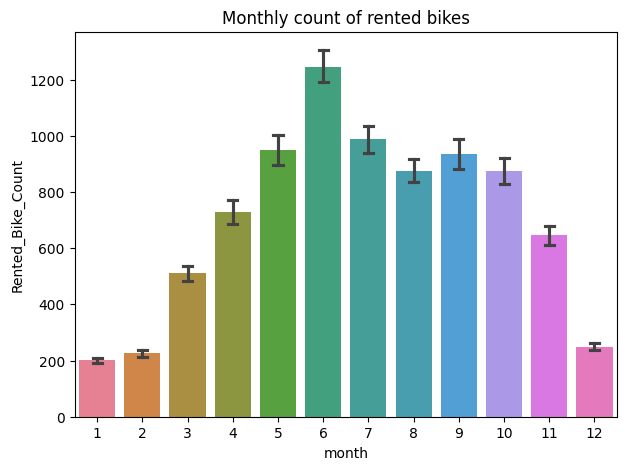

In [116]:
# Chart - 1 Monthly count of rented bikes
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
a = sns.barplot(x='month',y='Rented_Bike_Count',data=bike_df,ax=ax,capsize=.2,hue='month')
a.legend_.remove()
ax.set_title('Monthly count of rented bikes')
plt.show()

##### 1. Why did you pick the specific chart?

***The bar graph is used to compare the Rented_Bike_Count between different months over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.***

***Thus, I have used the bar plot to show the Month wise Rented Bike Counts.***

##### 2. What is/are the insight(s) found from the chart?

***From the above barplot it is clear that in the summer seasons(May-October), the demand of rented bike is high as compared to other months.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Yes, this insight can help create positive business impact. The bike rental servies can provide attractive offers during off season to attract customers and create more revenue.***

#### Chart - 2 Hour

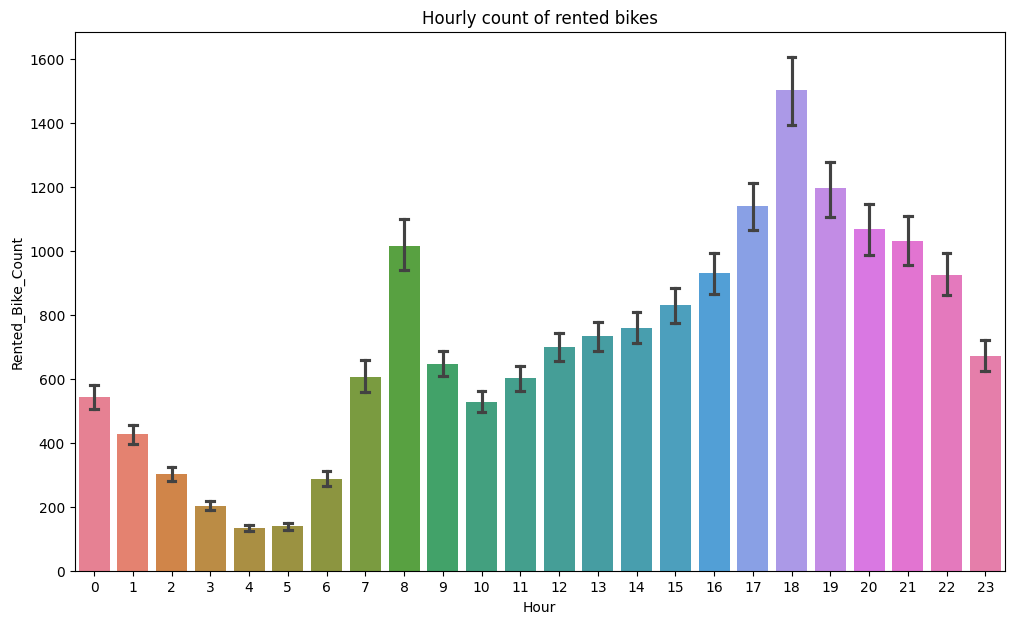

In [117]:
# Chart - 2 Count of rented bikes according to hour
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
a = sns.barplot(x='Hour',y='Rented_Bike_Count',data=bike_df,ax=ax,capsize=.2,hue='Hour')
a.legend_.remove()
ax.set_title('Hourly count of rented bikes')
plt.show()

##### 1. Why did you pick the specific chart?

***The bar graph is used to compare the Rented_Bike_Count between different hour. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.***

***Thus, I have used the bar plot to show the Hour wise Rented Bike Counts.***

##### 2. What is/are the insight(s) found from the chart?

***From the above bar plot we can conclude that generally people use rented bikes during morning(7am to 9am) and evening hours(4pm to 9pm).***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Yes, this insight can help create positive business impact. The bike rental servies can provide attractive offers during off hours to attract customers and create more revenue.***

#### Chart - 3 Season

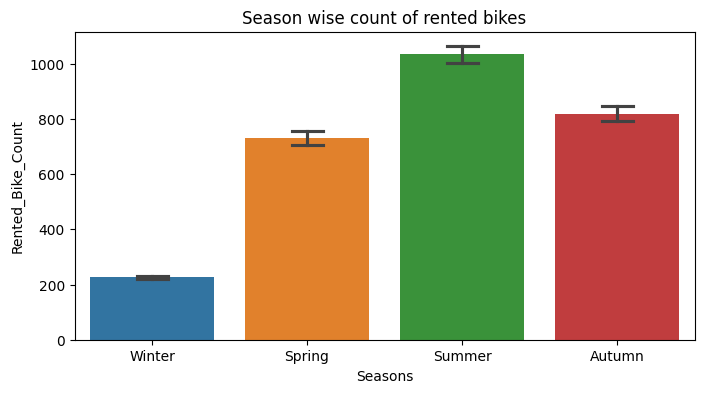

In [118]:
# Chart - 3 Season wise Rented Bike Count
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
sns.barplot(x='Seasons',y='Rented_Bike_Count',data=bike_df,ax=ax,capsize=.2,hue='Seasons')
ax.set_title('Season wise count of rented bikes')
plt.show()

[Text(0.5, 1.0, 'Season wise count of Rented bikes')]

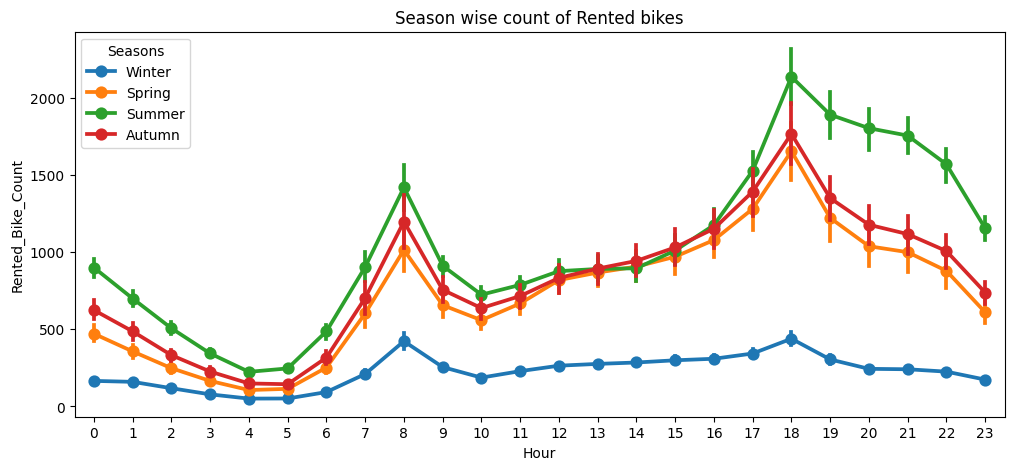

In [119]:
fig,ax=plt.subplots(figsize=(12,5))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Season wise count of Rented bikes')

##### 1. Why did you pick the specific chart?

***Bar chart is used to compare Rented_Bike_Counts during different seasons And the pointplot is used to compare hour wise trend of rented bikes during different seasons.***

##### 2. What is/are the insight(s) found from the chart?

***The bar plot shows that people use rented bikes most in the summer and least during winter season.***

***From the pointplot it is clear that in Spring, Autumn, and Summer seasons people use rented bikes in the morning and in the evening hours. While in the winter season use of rented bikes is low maybe because of the cold.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Different pricing strategy during different seasons and attractive offers may be able to help generate more revenue.***

#### Chart - 4 weekday_weekend

[Text(0.5, 1.0, 'Hour wise Count of Rented bikes according to weekday_weekend')]

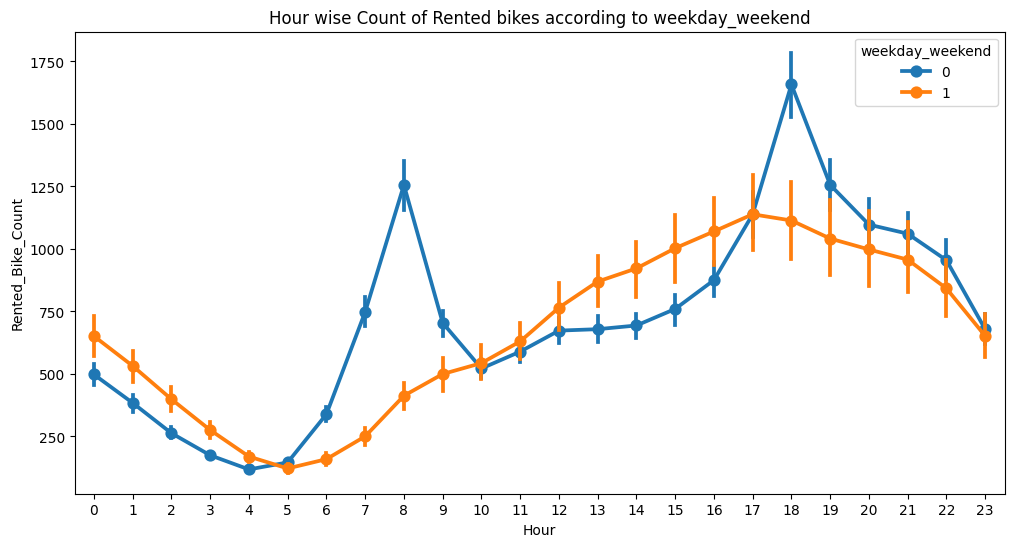

In [120]:
# Chart - 4 Hour wise Count of Rented bikes according to weekday_weekend
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekday_weekend',ax=ax)
ax.set(title='Hour wise Count of Rented bikes according to weekday_weekend')

##### 1. Why did you pick the specific chart?

***I've used this pointplot to compare hour wise count of rented bikes during weekdays and weekends.***

##### 2. What is/are the insight(s) found from the chart?

***From the above pointplot we can say that demand of rented bike is higher during weekdays while it is less during weekends, the peak hours during weekdays are 7AM to 9AM and 4PM to 9PM whereas during weekends people are likely to use rented bikes in the evening hours. This maybe because people uses rented bikes during weekdays for office purposes.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***By planning pricing strategies during the peak hours, the business may be able to gain more revenue.***

#### Chart - 5 Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

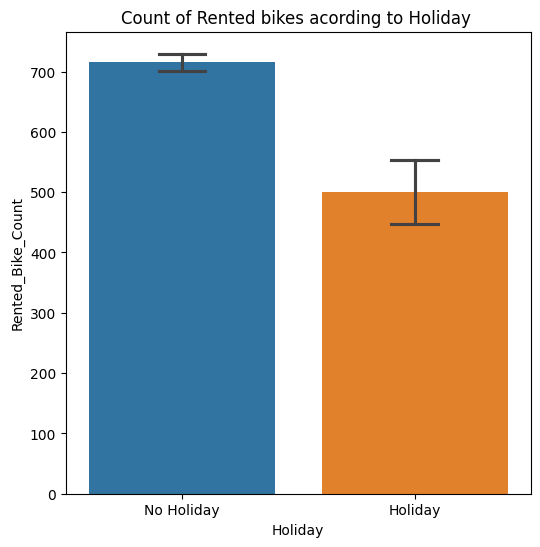

In [121]:
# Chart - 5 Count of Rented bikes acording to Holiday

fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2, hue='Holiday')
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

***Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data. I have used bar chart to compare bike rented count during holidays and non holidays.***

##### 2. What is/are the insight(s) found from the chart?

***The above chart clearly shows that people uses more rented bikes during regular days compared to holidays.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***It doesn't lead to negative growth. Business should develop attractive strategies to lure customers during holidays.***

####Analyzing Numerical Variables

In [122]:
# Separating numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


#### Chart - 6 Distplot (Analyzing skewness)

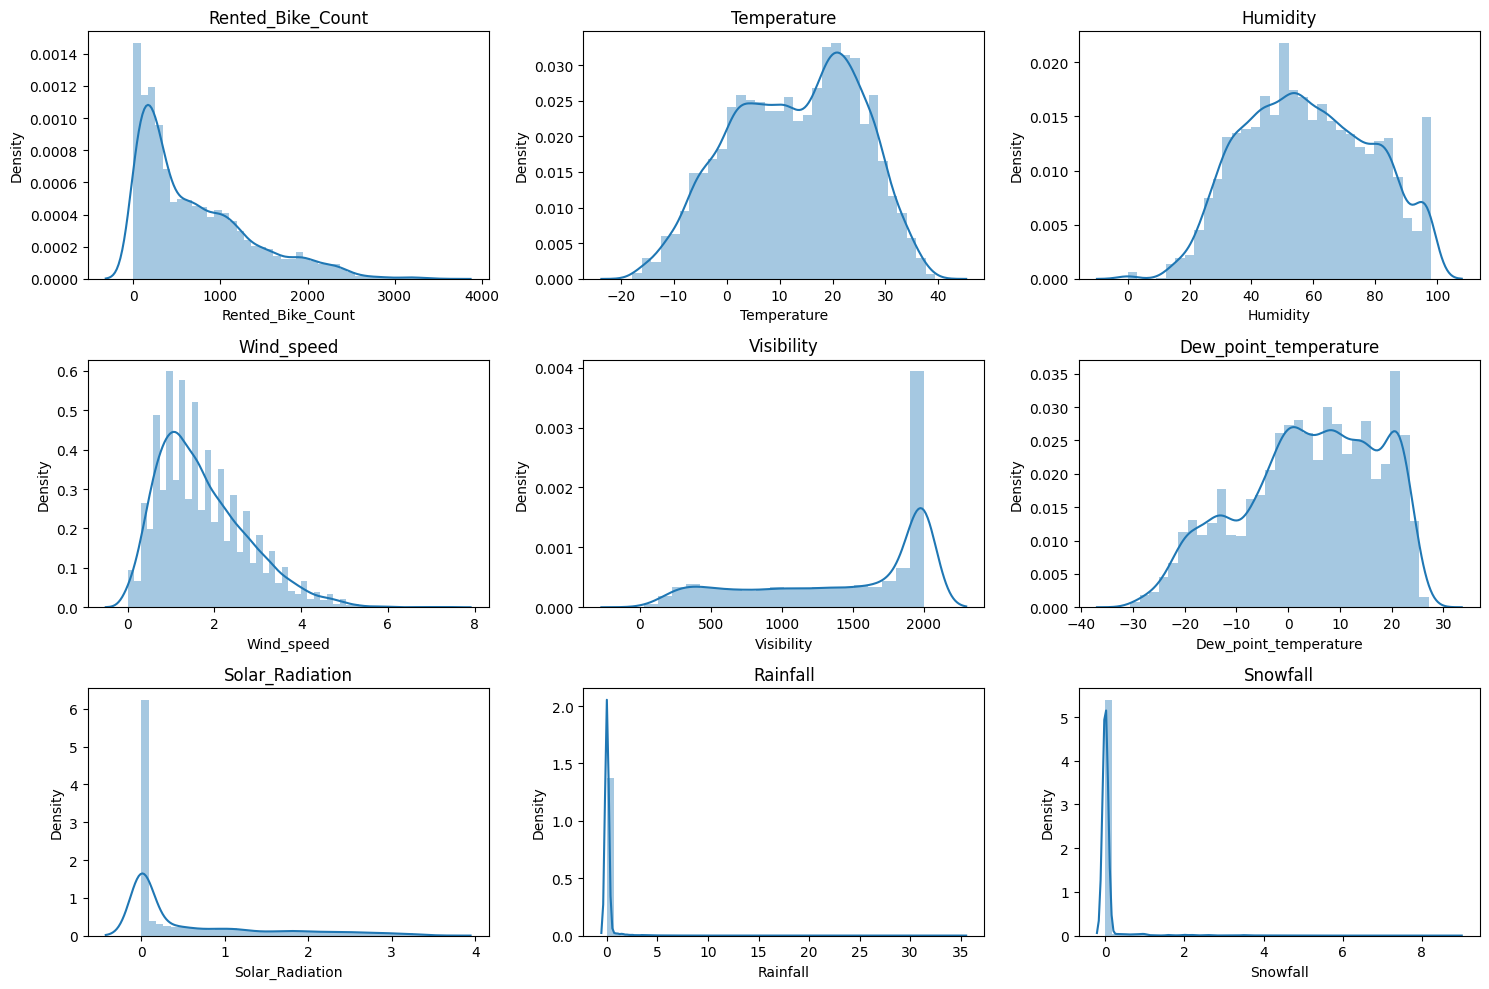

In [123]:
# Chart - 6 Distplot of different numeric features in the dataset
# Printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

***Distplot is useful to check the distribution of numerical features in the dataset. It clearly shows if there is skewness in the data. Hence, I used this chart.***

##### 2. What is/are the insight(s) found from the chart?

**Right skewed columns are:**

Rented_Bike_Count (Dependent variable), Wind_speed, Solar_Radiation, Rainfall, Snowfall,

**Left skewed columns are:**

Visibility, Dew_point_temperature

#### Chart - 7 "Temperature" vs "Rented_Bike_Count"

<Axes: xlabel='Temperature'>

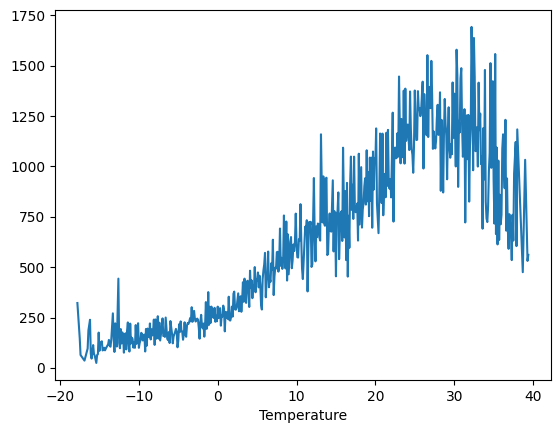

In [124]:
# Chart - 7 Temperature vs Rented_Bike_Count
# Plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

***To analyze the change of Rented_Bike_Count(dependent variable) with Temperature.***

##### 2. What is/are the insight(s) found from the chart?

***People are likely to ride a bike when the Temperature is around 25°C to 30°C.***

#### Chart - 8 Dew_point_temperature vs Rented_Bike_Count

<Axes: xlabel='Dew_point_temperature'>

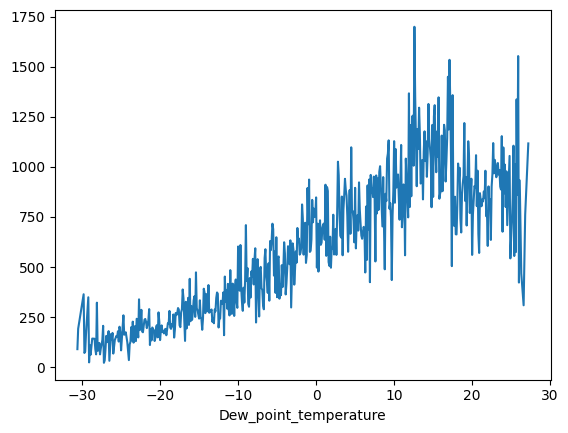

In [125]:
# Chart - 8 Dew_point_temperature vs Rented_Bike_Count
# Plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

***To analyze the change of Rented_Bike_Count(dependent variable) with Dew_point_temperature.***

##### 2. What is/are the insight(s) found from the chart?

***The above plot shows that people likes to ride bike when the Dew_point_temperature is above 10 and below 25.***

#### Chart - 9 "Rented_Bike_Count" vs "Solar_Radiation"

<Axes: xlabel='Solar_Radiation'>

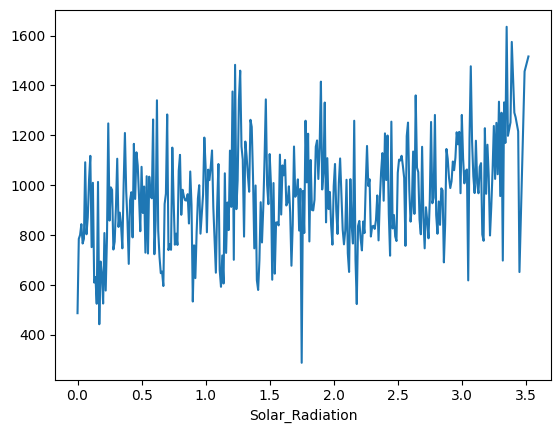

In [126]:
# Chart - 9 "Rented_Bike_Count" vs "Solar_Radiation"
# Plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

***To analyze the change in Rented_Bike_Count(dependent variable) with Solar_Radiation.***

##### 2. What is/are the insight(s) found from the chart?

***From the above plot we can see an increasing trend in the Rented_Bike_Count with increasing Solar_Radiation.***

#### Chart - 10 "Rented_Bike_Count" vs "Snowfall"

<Axes: xlabel='Snowfall'>

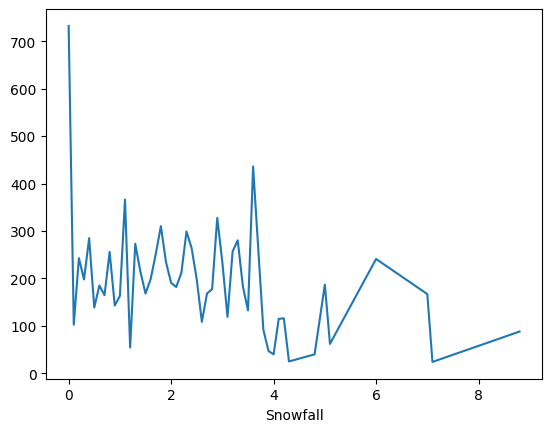

In [127]:
# Chart - 10 "Rented_Bike_Count" vs "Snowfall"
# Plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

***To visualize the change in Rented_Bike_Count(dependent variable) with Snowfall.***

##### 2. What is/are the insight(s) found from the chart?

***Increasing snowfall leads to less Rented_Bike_Count. That means customers do not prefer to ride bike when its snowfall.***

#### Chart - 11 "Rented_Bike_Count" vs "Rainfall"

<Axes: xlabel='Rainfall'>

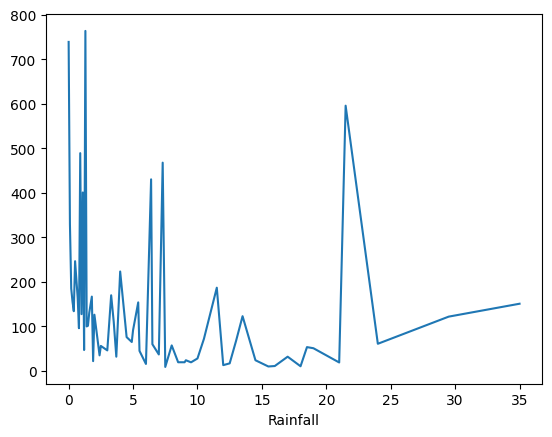

In [128]:
# Chart - 11 "Rented_Bike_Count" vs "Rainfall"
# Plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

***To analyze the change in Rented_Bike_Count(dependent variable) with Rainfall.***

##### 2. What is/are the insight(s) found from the chart?

***Above plot shows that customer do not prefer to ride bike during rainfall. But we can see a peak when it's 20mm rain, which might be due to some outlier in the data.***

#### Chart - 12 "Rented_Bike_Count" vs "Wind_speed"

<Axes: xlabel='Wind_speed'>

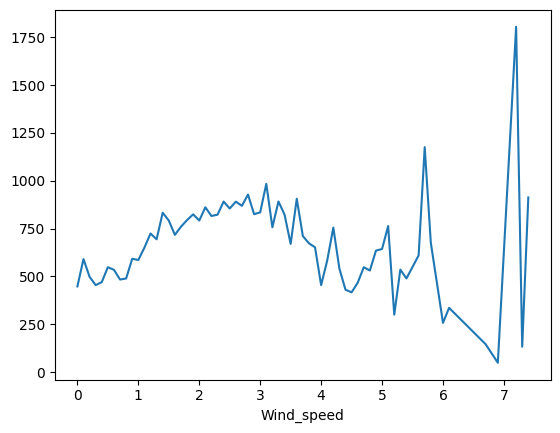

In [129]:
# Chart - 12 "Rented_Bike_Count" vs "Wind_speed"
# Plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed')['Rented_Bike_Count'].mean().plot()

##### 1. Why did you pick the specific chart?

***To visualize the change in Rented_Bike_Count(dependent variable) with Wind_speed.***

##### 2. What is/are the insight(s) found from the chart?

***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

#### Chart - 13 Regression Plot

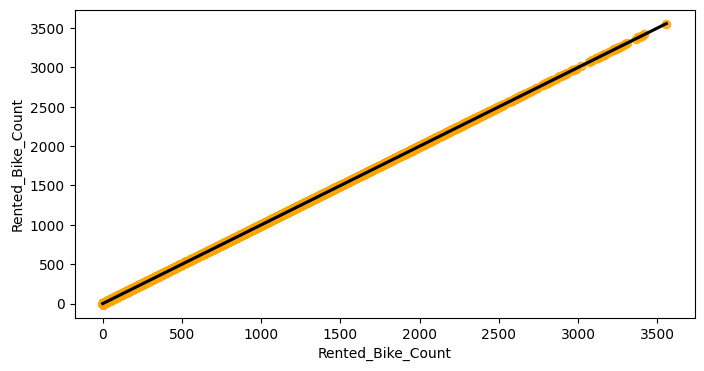

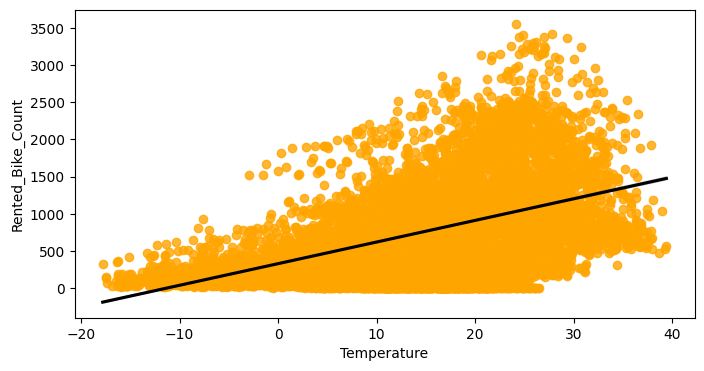

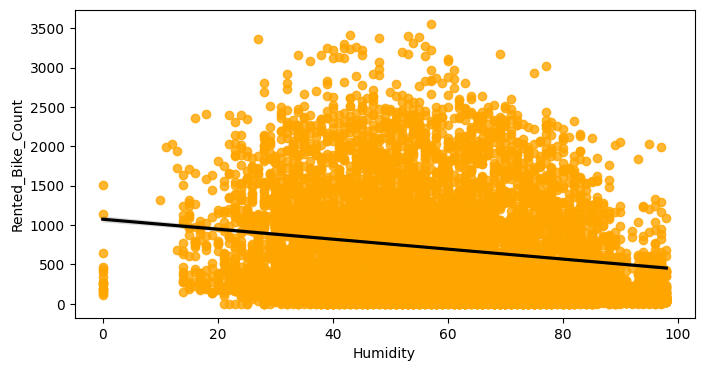

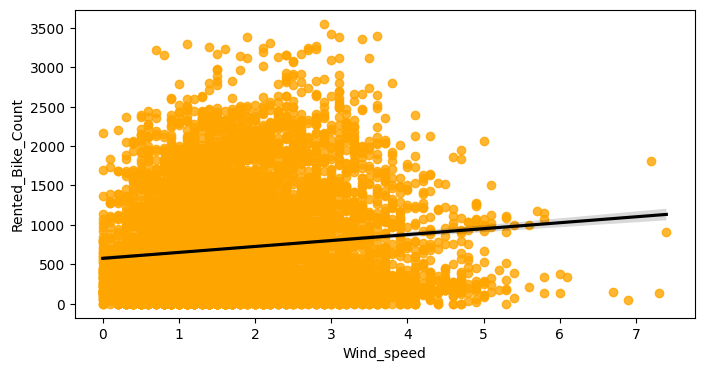

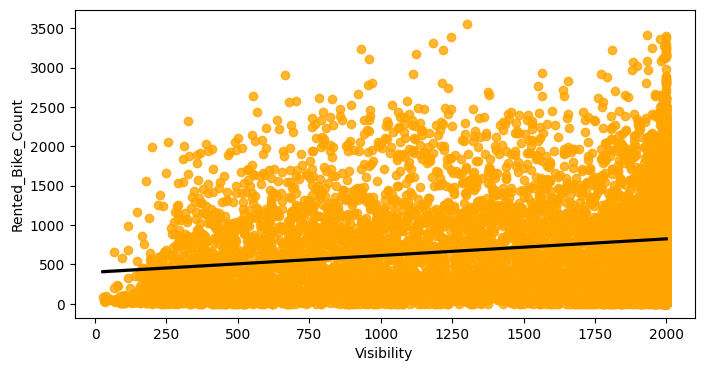

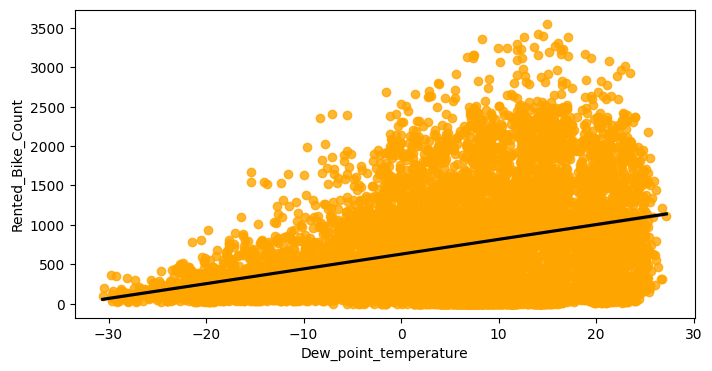

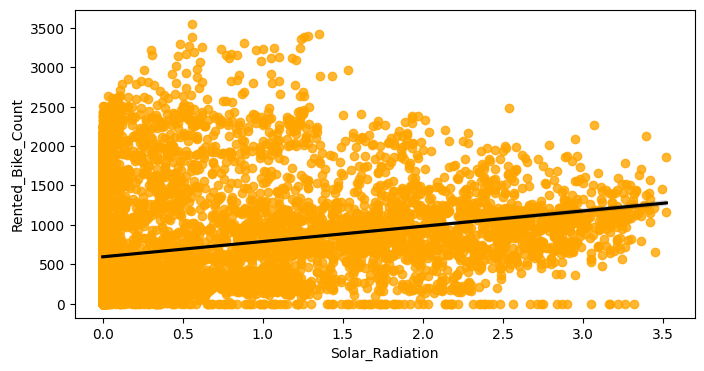

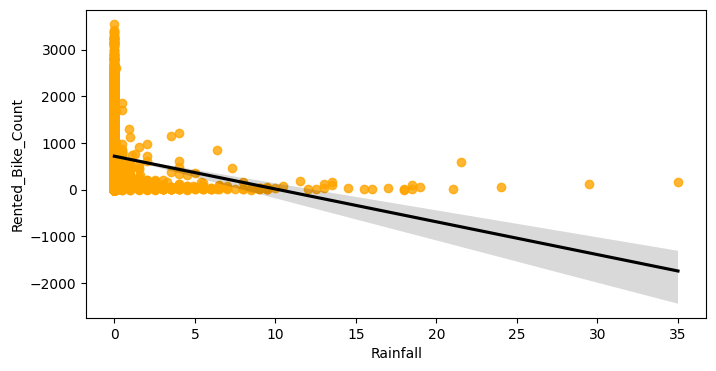

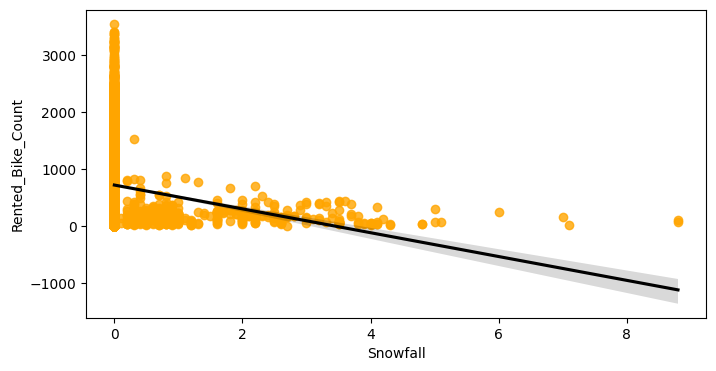

In [130]:
# Chart - 13 Regression Plot
# Plotting the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

***Regression plots are used to visualize the relationship between a dependent variable and one or more independent variables. They help identify trends, correlations, and potential predictive power of the independent variables in relation to the dependent variable.***

***I have used regression plots to understand the relationship between different numeric features with dependent variable(Bike_Rented_Count).***

##### 2. What is/are the insight(s) found from the chart?

***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable. Which means the rented bike count increases with increase of these features.***

***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase.***

#### Chart - 14 - Correlation Heatmap

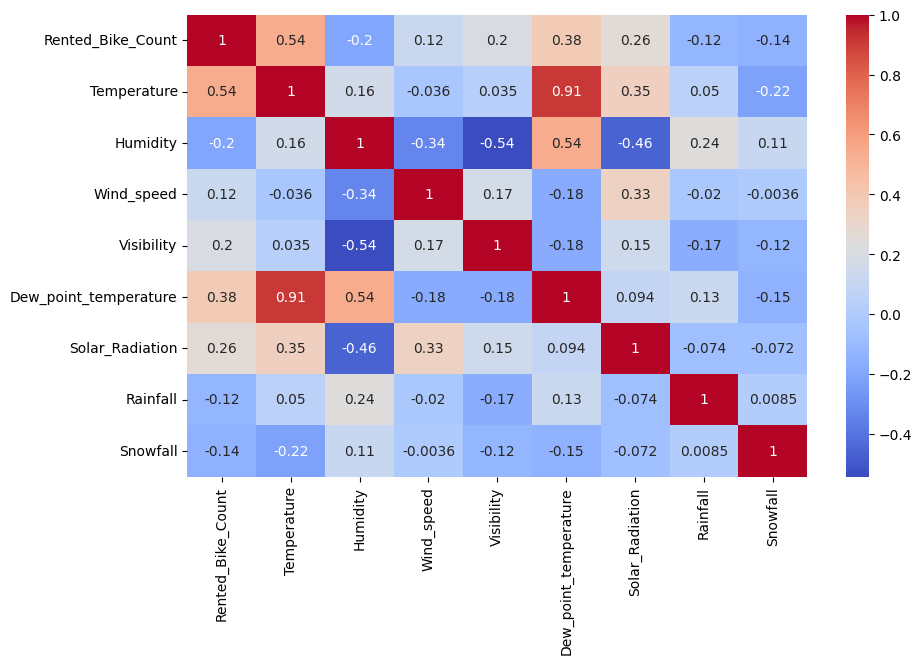

In [131]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(bike_df.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

***To understand the relationship(correlation) between different numeric variables.***

##### 2. What is/are the insight(s) found from the chart?

***Dew_point_temperature is highly poistively correlated with Temperature and Humidity.***

***Humidity is negatively correlated with visibility and Solar_radiation.***

## ***5. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : Dew_point_temperature is highly correlated to Temperature

Ha : Dew_point_temperature is not correlated to Temperature

#### 2. Perform an appropriate statistical test.

In [132]:

# Import the module
# Assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [133]:
# Add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [134]:
# Fit into OLS model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:39:56   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
p_value=model.pvalues[5]
p_value

0.858829005884025

##### Which statistical test have you done to obtain P-Value?

**We used the OLD(Ordinary Least Square) function from the statsmodel package**

**In this case since the p value(0.858) is greater than the significance level of 0.05, we failed to reject the null hypothesis. Therefore there is a relationship between Dew_point_temperature and Temperature.**

##### Why did you choose the specific statistical test?

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

**Hence it is useful to check correlation between different variables.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : There is a relationship between Dew_point_temperature and Visibility

Ha : There is no relationship between Dew_point_temperature and visibility

#### 2. Perform an appropriate statistical test.

In [136]:
p_value=model.pvalues[4]
p_value

0.37562797875878773

##### Which statistical test have you done to obtain P-Value?

**We used the OLD(Ordinary Least Square) function from the statsmodel package**

**In this case since the p value(0.375) is greater than the significance level of 0.05, we failed to reject the null hypothesis. Therefore there is a relationship between Dew_point_temperature and Visibility.**

##### Why did you choose the specific statistical test?

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

**Hence it is useful to check correlation between different variables.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [137]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Wind_speed,0
Visibility,0
Dew_point_temperature,0
Solar_Radiation,0
Rainfall,0
Snowfall,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

***There are no missing values in the dataset.***

### 2. Handling Outliers

In [138]:
# Handling Outliers & Outlier treatments
bike_df.describe([0.25,0.50,0.75,0.95,0.99])

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
95%,2043.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
99%,2526.230000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


***There are not much outliers in the dataset. The skewness in data will be removed using log transformation.***

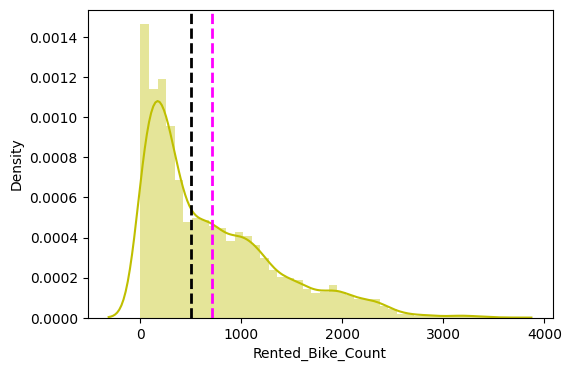

In [139]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(6,4))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

***Seems like outlier lies on the left hand side of the curve.***

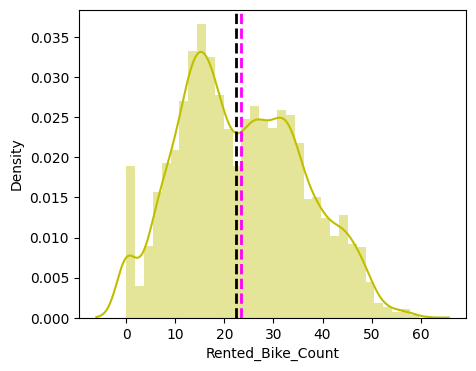

In [140]:
# Using Transformation
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(5,4))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

### 3. Categorical Encoding

In [141]:
# Encode your categorical columns
# Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday_weekend'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

***In the dataset there are not many categories present, and there is less number of features hence, we will only use one hot encoding.***

####One Hot Encoding

In [142]:
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [143]:
# Manipulate Features to minimize feature correlation and create new features
# Dropping the Dew point temperature column
bike_df_copy = bike_df_copy.drop(['Dew_point_temperature'],axis=1)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

***No, data doesn't need any further transformation.***

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

***Not needed, there are already less number of features in our dataset. Dimensionality reduction may cause underfitting.***

### 7. Data Splitting

In [144]:
# Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [145]:
print(X.shape)
print(y.shape)

(8760, 47)
(8760,)


In [146]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


##### What data splitting ratio have you used and why?

***I have used 75|25 Train test split***

***75% for training purpose and 25% for testing purpose.***

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

***It is not needed since, our dataset do not suffer with imbalance data.***

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [147]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)

# Predict on the model
y_pred = reg.predict(X_test)

In [148]:
reg.score(X_test, y_test)

0.7893518495661391

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Linear Regression:**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

**Evaluation Metrics:**

* The mean squared error (MSE) tells us how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as we’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

In [149]:
# Getting the X_train and X_test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [150]:
# Visualizing evaluation Metric Score chart for training set

# Calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# Calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# Calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

# Calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07751297904005
RMSE : 5.922627202436437
MAE : 4.474024901685575
R2 : 0.7722101541946631
Adjusted R2 : 0.7672119643007085


In [151]:
# Visualizing evaluation Metric Score chart for test set

# Calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# Calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533069532234
RMSE : 5.768477329011733
MAE : 4.410179183306472
R2 : 0.7893518495661391
Adjusted R2 : 0.7847297846406529



***The model shows a Mean Squared Error (MSE) of 33.28 and a Root Mean Squared Error (RMSE) of 5.77, indicating the average squared difference and average absolute difference between predicted and actual values, respectively. The Mean Absolute Error (MAE) of 4.41 suggests that, on average, predictions are off by about 4.41 units. An R-squared (R2) value of 0.789 and an Adjusted R-squared of 0.785 indicate that the model explains roughly 78.9% of the variance in the data, which signifies a good fit but with some room for improvement.***

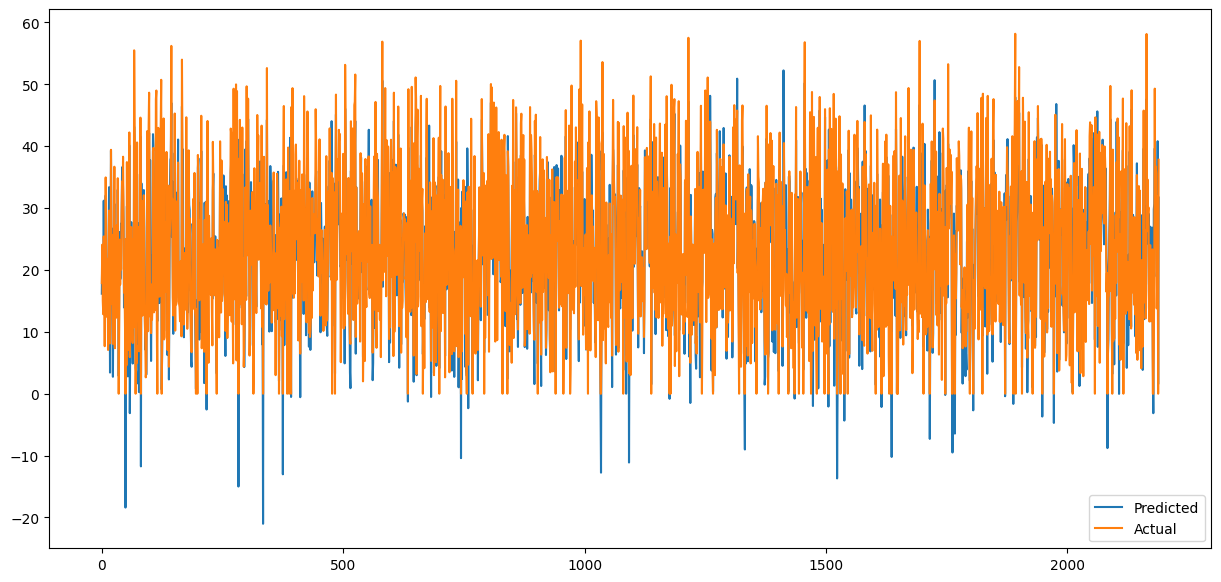

In [152]:
plt.figure(figsize=(15,7))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

***The above graph indicates a strong prediction accuracy, evidenced by an R² score of 0.78.***

***The graph illustrates the comparison between predicted and actual values, showing high variability and significant fluctuations. Despite capturing the overall trend, the model exhibits noticeable prediction errors, indicating challenges with accuracy possibly due to data noise or model limitations.***

Text(0.5, 0.98, 'Residual Analysis')

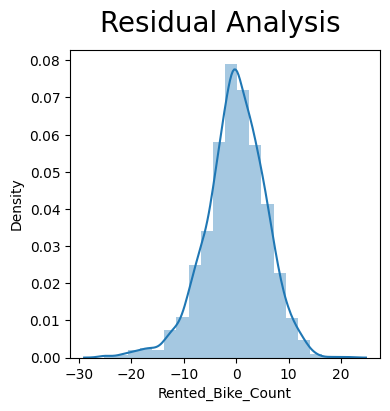

In [153]:
# Residual Analyis
fig=plt.figure(figsize=(4,4))

sns.distplot((y_test - y_pred),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

***The residual analysis graph shows a near-normal distribution of residuals centered around zero, indicating that the model's errors are symmetrically distributed and suggesting that the model has a good fit with no major bias.***

Text(0.5, 1.0, 'Heteroscedasticity')

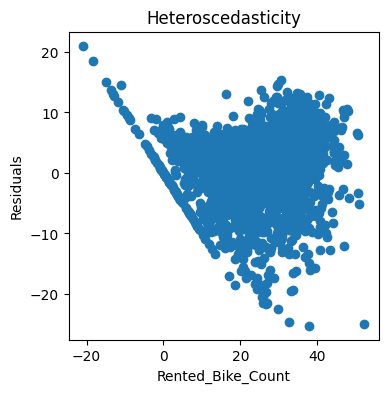

In [154]:
# Let's try to find heteroscedasticity
plt.figure(figsize=(4,4))
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity')

***The scatter plot indicates heteroscedasticity, with residuals spreading out more as the rented bike count increases, suggesting that the model's variance of errors is not constant and may be higher for larger values.***

### ML Model - 2 Lasso Regression

In [155]:
# ML Model 2 - Lasso implementation
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [156]:
lasso.score(X_train, y_train)

0.7722100789835628

In [157]:
lasso.coef_

array([ 5.11751261e-01, -1.27268160e-01, -2.85824720e-02,  9.91277135e-04,
        8.85252615e-01, -1.48169326e+00, -8.04105765e-02, -2.03704776e+00,
       -4.95304988e+00, -7.23093811e+00, -9.51321082e+00, -9.03881949e+00,
       -4.02637952e+00,  2.27606413e+00,  7.54643927e+00,  1.25829310e+00,
       -3.26080373e+00, -3.44938269e+00, -2.73010836e+00, -2.95220435e+00,
       -3.17257572e+00, -1.91195216e+00,  1.15193212e-01,  3.83383921e+00,
        1.02396981e+01,  6.78184413e+00,  6.08007996e+00,  6.20252056e+00,
        5.04575720e+00,  1.46713316e+00, -2.14706318e-05, -2.28176460e-01,
       -4.87392001e+00,  3.50885617e+00,  2.82716072e+01, -8.13036837e-01,
       -2.09119058e+00, -1.22783910e+00,  1.17717979e+00,  3.30338291e+00,
       -2.81909287e+00, -5.07579899e+00,  5.51062456e-01,  3.21376119e+00,
        2.55974019e+00,  2.06915332e+00, -1.42392376e+00])

In [158]:
# Predict on the model
y_pred_lasso = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that includes a penalty term to constrain the coefficients of the model. This penalty term is the sum of the absolute values of the coefficients, which encourages sparsity by shrinking some coefficients to exactly zero. This makes Lasso useful for feature selection, as it can effectively reduce the number of variables in a model. By balancing the trade-off between fitting the data and keeping the model simple, Lasso regression helps prevent overfitting.

In [159]:
# Calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_lasso)
print("MSE :",MSE_lr)

# Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# Calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_lasso)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_lasso))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27527012950149
RMSE : 5.768472079285943
MAE : 4.410194297149665
R2 : 0.7893522329756462
Adjusted R2 : 0.7847301764629736


***The model exhibits a Mean Squared Error (MSE) of 33.28 and a Root Mean Squared Error (RMSE) of 5.77, indicating the average squared and absolute errors between predicted and actual values, respectively. The Mean Absolute Error (MAE) of 4.41 suggests that predictions deviate from actual values by approximately 4.41 units on average. With an R-squared (R2) of 0.789 and an Adjusted R-squared of 0.785, the model explains about 78.9% of the variance in the data, indicating a strong fit but still leaving some variance unexplained.***

Text(0, 0.5, 'Predicted Rented_Bike_Count')

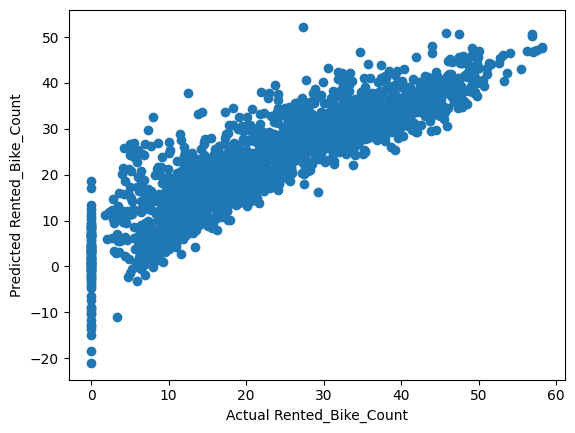

In [160]:
# Scater plot between Actual and Predicted Rental_Bike_Count
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Rented_Bike_Count')
plt.ylabel('Predicted Rented_Bike_Count')

***The scatter plot suggests that the model is able to capture the general trend in rented bike counts but may have limitations in accurately predicting certain values.***

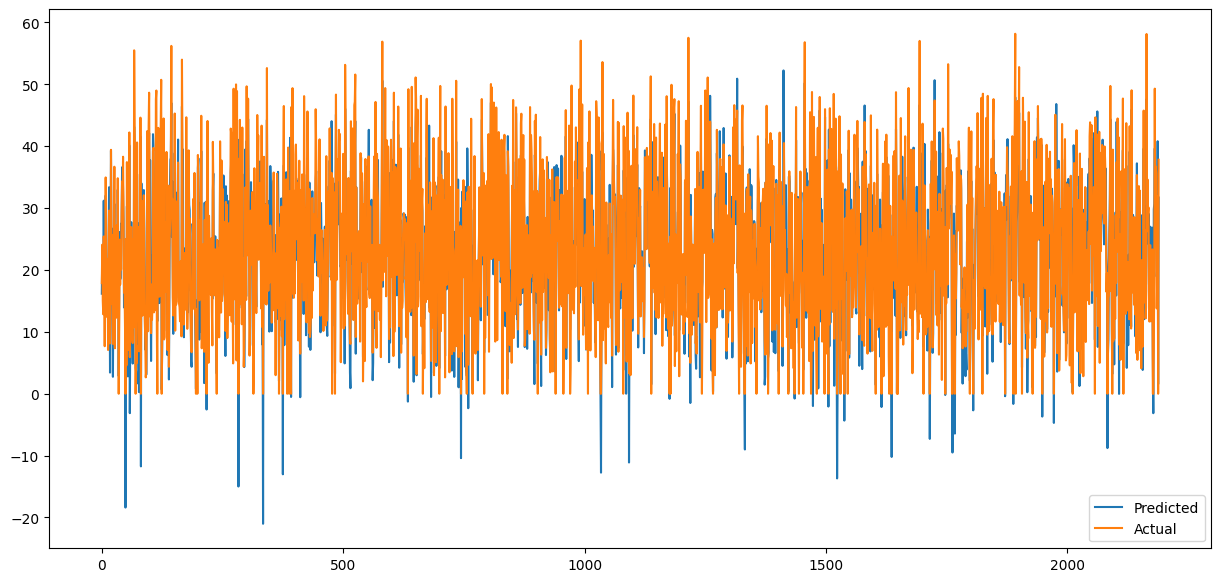

In [161]:
plt.figure(figsize=(15,7))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

***The graph above demonstrates a commendable prediction accuracy, as reflected by an R² score of 0.78. It compares predicted values to actual values, revealing considerable variability and notable fluctuations. While the model successfully captures the overall trend, it shows evident prediction errors. These errors suggest potential issues with accuracy, likely from data noise or inherent limitations of the model.***

Text(0.5, 0.98, 'Residual Analysis')

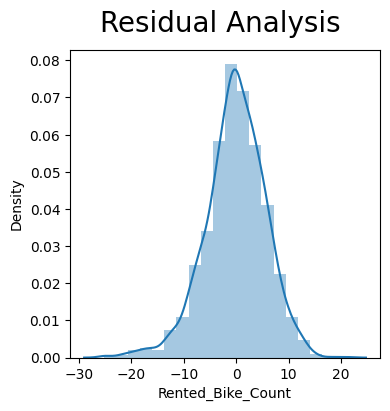

In [162]:
# Residual Analyis
fig=plt.figure(figsize=(4,4))

sns.distplot((y_test - y_pred_lasso),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

***The residual analysis graph displays a near-normal distribution of residuals centered around zero, implying that the model's errors are symmetrically distributed. This suggests a good model fit with no significant bias present.***

Text(0.5, 1.0, 'Heteroscedasticity')

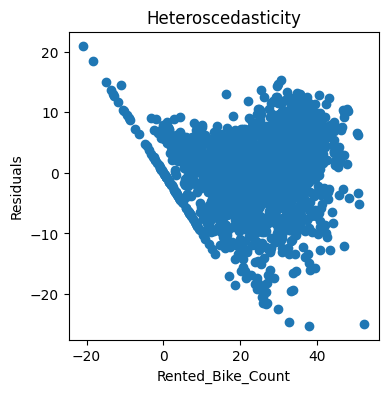

In [163]:
# Let's try to find heteroscedasticity
plt.figure(figsize=(4,4))
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity')

***The scatter plot reveals heteroscedasticity, as the residuals become more dispersed with an increase in the rented bike count. This suggests that the model's error variance is not constant and tends to be higher for larger values.***

#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [165]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -35.7323616934093


In [166]:
# Predict on the model
y_pred_lassocv = lasso_regressor.predict(X_test)

In [167]:
# Evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_lassocv))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_lassocv))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lassocv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lassocv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 33.27578088545121
MAE : 4.410371317729226
RMSE : 5.76851635045366
R2 : 0.7893489996555294
Adjusted R2 :  0.7847268721969907


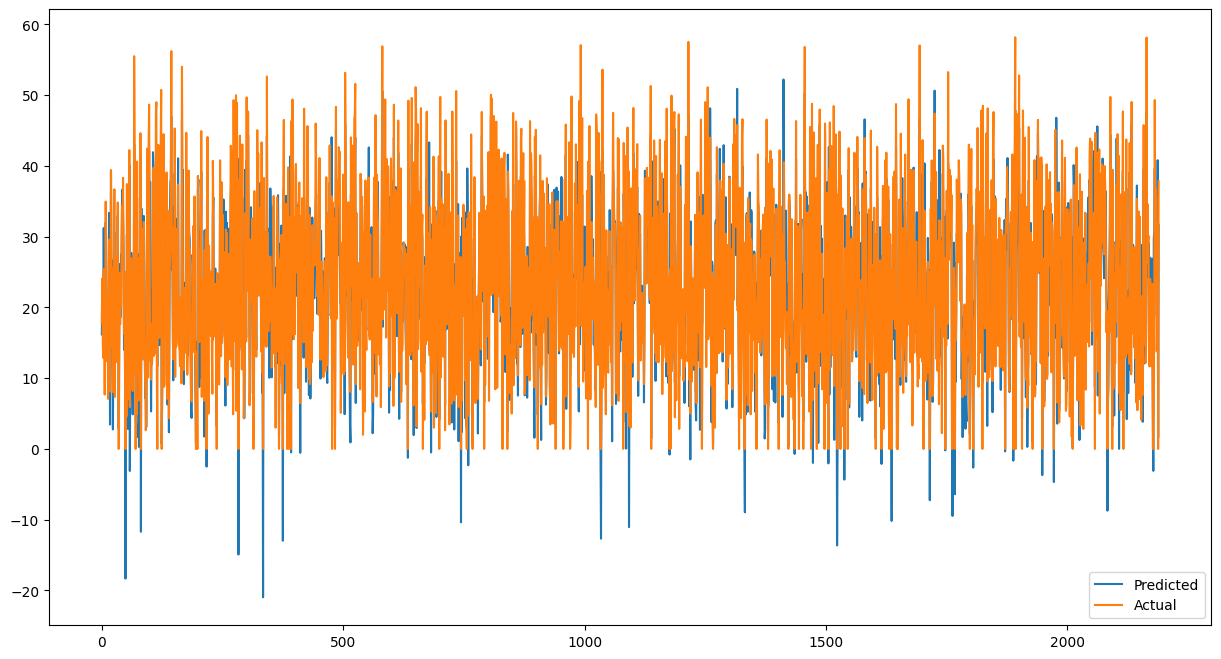

In [168]:
plt.figure(figsize=(15, 8))
plt.plot((y_pred_lassocv))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

***The graph above indicates strong prediction accuracy, evidenced by an R² score of 0.78. It contrasts predicted values with actual values, highlighting significant variability and noticeable fluctuations. Although the model effectively captures the overall trend, there are clear prediction errors. These errors point to possible accuracy issues, likely caused by data noise or model limitations.***

Text(0.5, 0.98, 'Residual Analysis')

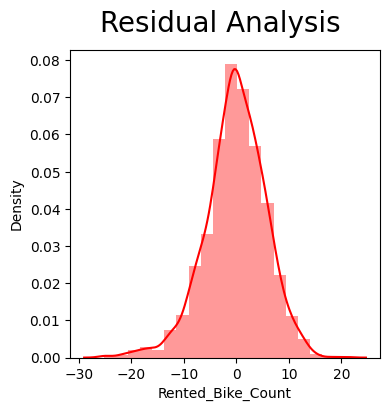

In [169]:
#Resuldual Analysis
fig=plt.figure(figsize=(4,4))

sns.distplot(((y_test)- (y_pred_lassocv)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

***The residual analysis graph shows that the residuals are distributed nearly normally and centered around zero, indicating that the model's errors are symmetrically distributed. This implies that the model fits well and does not exhibit significant bias.***

Text(0, 0.5, 'Residuals')

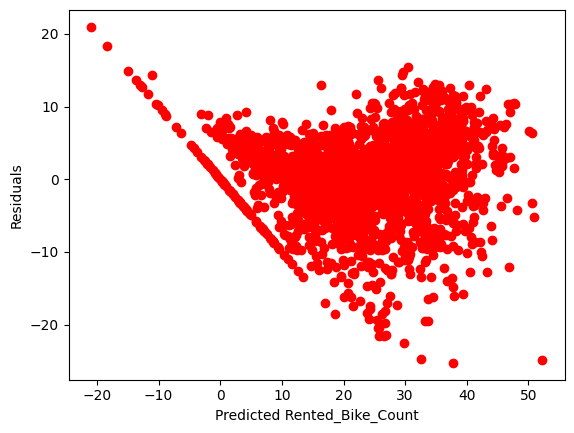

In [170]:
### Heteroscadacity
plt.scatter((y_pred_lassocv),(y_test)-(y_pred_lassocv),c='r')
plt.xlabel('Predicted Rented_Bike_Count')
plt.ylabel('Residuals')

***The scatter plot reveals heteroscedasticity, as the residuals become more dispersed with an increase in the rented bike count. This suggests that the model's error variance is not constant and tends to be higher for larger values.***

##### Which hyperparameter optimization technique have you used and why?

**I have used GridSearchCV Hyperparameter optimization technique. This optimization is used to systematically search through a specified parameter grid. It evaluates model performance for each combination of hyperparameters using cross-validation to find the optimal set. This ensures a thorough and efficient exploration of the hyperparameter space to enhance model performance.***

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the provided scores, there is no significant improvement in the performance metrics after using GridSearchCV for hyperparameter optimization on the Lasso model. The evaluation metrics for both the basic Lasso model and the Lasso model with GridSearchCV are very similar.

Evaluation Metric Score Chart

      Metric	   Lasso Model	Lasso with GridSearchCV	Improvement
      MSE	       33.2753	         33.2758	           -0.0005
      RMSE	       5.7685	          5.7685	            0.0000
      MAE	        4.4102	          4.4104	           -0.0002
      R²	         0.7894	          0.7893	           -0.0001
      Adjusted R²	0.7847	          0.7847	            0.0000


Summary -

* MSE slightly increased from 33.2753 to 33.2758.
* RMSE remains essentially the same at 5.7685.
* MAE increased marginally from 4.4102 to 4.4104.
* R² decreased very slightly from 0.7894 to 0.7893.
* Adjusted R² remains the same at 0.7847.

The changes in the metrics are minimal and indicate that the hyperparameter optimization did not significantly improve the model's performance.








#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

#### Evaluation Metrics and Business Impact

1. **Mean Squared Error (MSE):**
   - **Indication:** Measures the average of the squared differences between actual and predicted values.
   - **Business Impact:** Lower MSE indicates more accurate predictions, reducing the cost of errors in business decisions, such as inventory management or pricing strategies.

2. **Root Mean Squared Error (RMSE):**
   - **Indication:** The square root of MSE, providing error magnitude in the same unit as the predicted variable.
   - **Business Impact:** Easier to interpret in business contexts (e.g., predicting sales in units), aiding in better understanding of prediction accuracy and facilitating actionable insights.

3. **Mean Absolute Error (MAE):**
   - **Indication:** Measures the average absolute differences between actual and predicted values.
   - **Business Impact:** Lower MAE means more precise predictions, directly impacting operational efficiency, customer satisfaction, and profitability by minimizing discrepancies.

4. **R² (R-Squared):**
   - **Indication:** Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
   - **Business Impact:** Higher R² signifies a better fit, meaning the model reliably explains the variability in outcomes, enhancing trust in data-driven decisions.

5. **Adjusted R²:**
   - **Indication:** Adjusts the R² for the number of predictors, providing a more accurate measure of model performance.
   - **Business Impact:** Prevents overfitting by ensuring only meaningful variables are included, leading to more robust and generalizable business insights.

#### Business Impact of the ML Model

The Lasso regression model's strong predictive performance (R² of 0.789) enables accurate forecasting of bike rental demand, leading to optimized inventory management and resource allocation. Low error metrics (MAE of 4.41) minimize costs associated with demand misestimation, enhancing operational efficiency. Reliable predictions improve customer satisfaction by ensuring bike availability and support strategic planning for future growth and marketing efforts, ultimately boosting profitability and competitive advantage.

### ML Model - 3 Ridge Regression

Ridge regression is a linear regression technique that includes a regularization term to prevent overfitting by penalizing large coefficients. This regularization term is the L2 norm, which adds the squared magnitude of the coefficients to the loss function. By doing so, Ridge regression helps in managing multicollinearity and improving the model's generalization to new data.

In [171]:
# ML Model - 3 Implementation of Ridge Regression
# Fit the Algorithm
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [172]:
# Predict on the model
y_pred_r = ridge.predict(X_test)

In [173]:
ridge.score(X_train, y_train)

0.7722100789802107

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [174]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 33.27678426818438
MAE : 4.410414932539515
RMSE : 5.768603320404722
R2 : 0.7893426477812578
Adjusted R2 :  0.7847203809491939


Text(0, 0.5, 'Predicted Rented_Bike_Count')

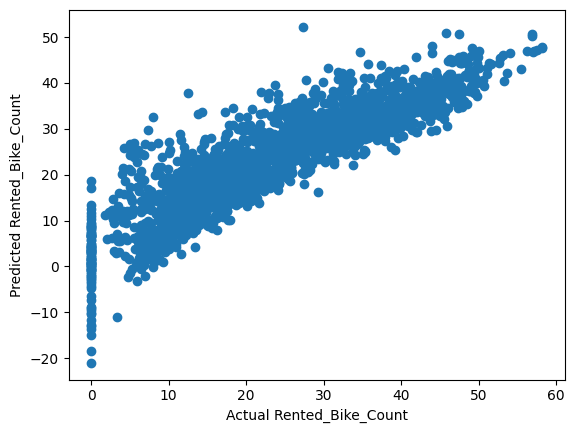

In [175]:
plt.scatter((y_test),(y_pred_r))
plt.xlabel('Actual Rented_Bike_Count')
plt.ylabel('Predicted Rented_Bike_Count')

***The scatter plot of actual vs. predicted rented bike counts shows a strong positive correlation, indicating the model's predictions are generally accurate. However, there is noticeable deviation and some underestimation at lower actual counts, suggesting potential areas for model improvement.***

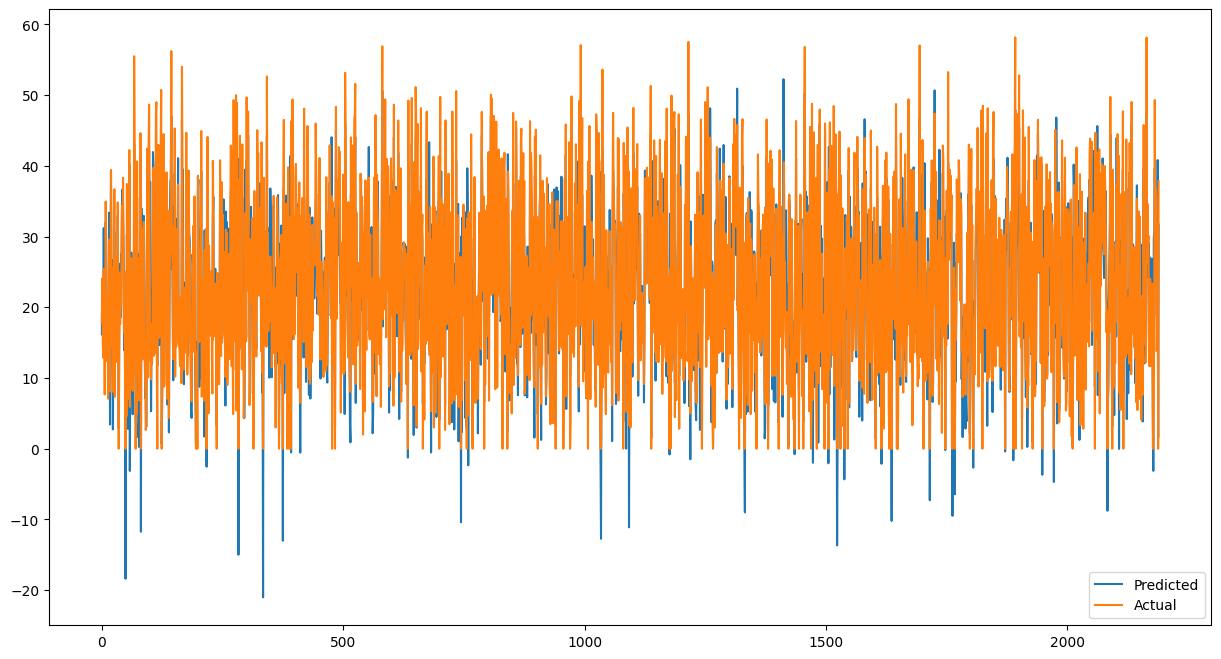

In [176]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_r)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

***The time series plot of actual vs. predicted rented bike counts shows that the model's predictions closely follow the actual values, indicating good performance. However, there are some instances of significant deviations, suggesting occasional prediction errors that might need further refinement in the model.***

Text(0.5, 0.98, 'Residual Analysis')

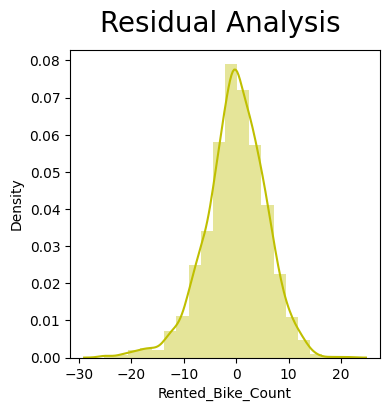

In [177]:
#Resuldual Analysis
fig=plt.figure(figsize=(4,4))

sns.distplot(((y_test)- (y_pred_r)),bins=20,color='y')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

***The residual analysis plot shows a near-normal distribution centered around zero, indicating that the model's prediction errors are symmetrically distributed and there are no significant biases. This suggests that the model is well-calibrated and performs consistently across the range of rented bike counts.***

Text(0, 0.5, 'Residuals')

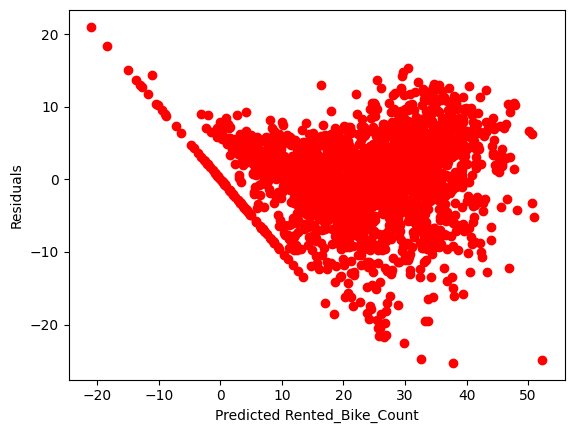

In [178]:
### Heteroscadacity
plt.scatter((y_pred_r),(y_test)-(y_pred_r),c='r')
plt.xlabel('Predicted Rented_Bike_Count')
plt.ylabel('Residuals')

***The scatter plot indicates heteroscedasticity, with residuals spreading out more as the rented bike count increases. This means the model's prediction errors grow larger for higher bike counts, showing that the error variance is not uniform.***

#### 2. Cross- Validation & Hyperparameter Tuning

In [179]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=4)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [180]:
# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [181]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -35.730695447407896


In [182]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 33.29094193082603
RMSE : 5.76983032080026
R2 : 0.789253023264007
Adjusted R2 :  0.784628789880911


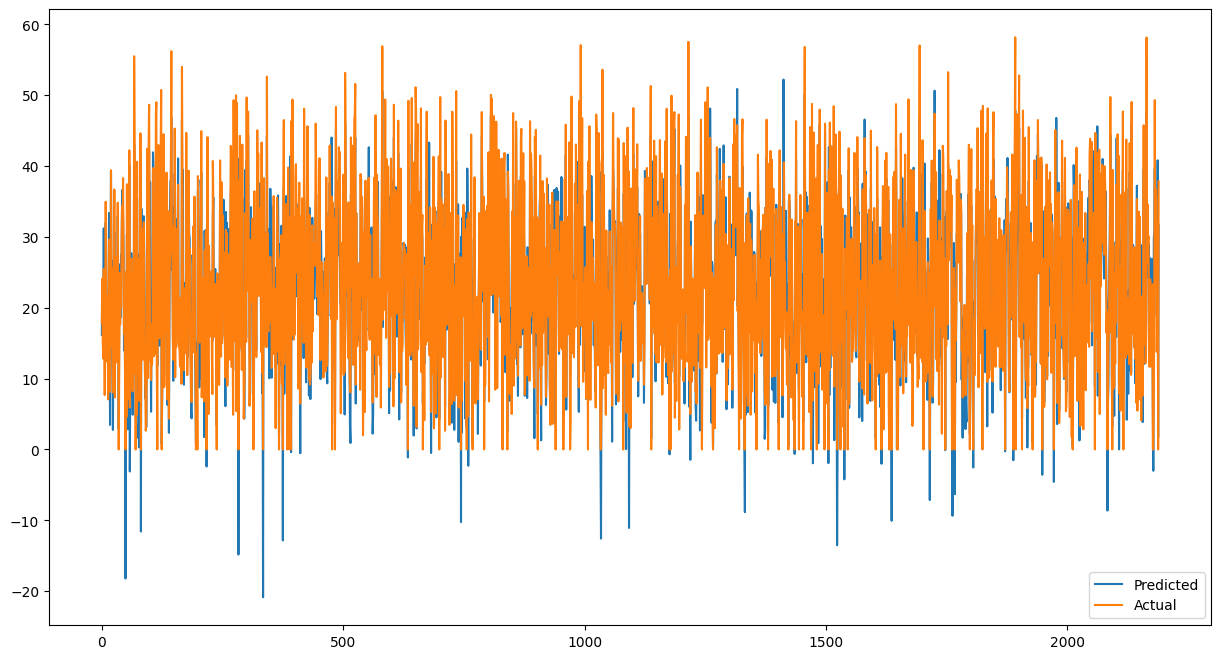

In [183]:
plt.figure(figsize=(15,8))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

***The time series plot comparing actual and predicted rented bike counts demonstrates that the model effectively tracks actual values, reflecting strong performance. Nonetheless, there are notable instances of discrepancies, indicating occasional prediction errors that may require further adjustments to enhance the model's accuracy.***

Text(0.5, 0.98, 'Residual Analysis')

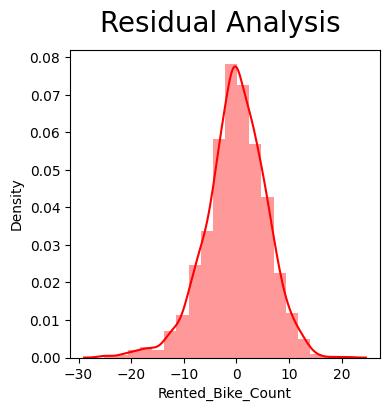

In [184]:
#Resuldual Analysis
fig=plt.figure(figsize=(4,4))

sns.distplot(((y_test)- (y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

***The residual analysis plot reveals a distribution that approximates normality, centered around zero, which indicates that the prediction errors are symmetrically distributed without any substantial biases. This implies that the model is well-calibrated and maintains consistent performance throughout the spectrum of rented bike counts.***

Text(0, 0.5, 'Residuals')

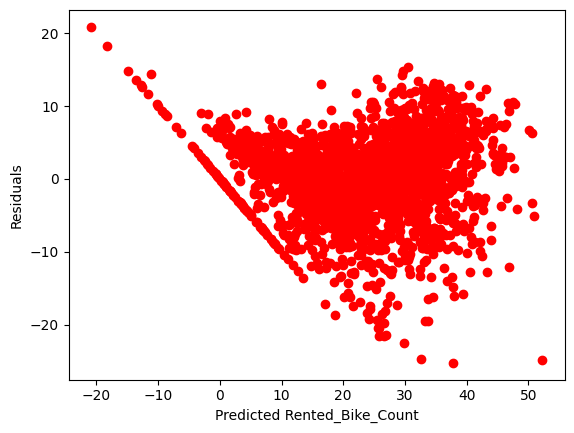

In [185]:
### Heteroscadacity
plt.scatter((y_pred_ridge),(y_test)-(y_pred_ridge),c='r')
plt.xlabel('Predicted Rented_Bike_Count')
plt.ylabel('Residuals')

***The scatter plot reveals the presence of heteroscedasticity, as the spread of residuals increases with higher rented bike counts. This indicates that the model's prediction errors become larger for greater bike counts, suggesting that the variance of the errors is not consistent across the range of predictions.***

##### Which hyperparameter optimization technique have you used and why?

**I utilized the GridSearchCV hyperparameter optimization technique to systematically explore a defined parameter grid. This approach assesses model performance for each combination of hyperparameters through cross-validation, allowing for the identification of the optimal set. By thoroughly and efficiently navigating the hyperparameter space, this method aims to improve overall model performance.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here are the evaluation metrics for both Ridge Regression (without GridSearchCV) and Ridge Regression (with GridSearchCV):

    Metric	    Ridge Regression	Ridge Regression with GridSearchCV
    MSE	          33.2768	          33.2909
    RMSE	          5.7686	           5.7698
    R²	            0.7893	           0.7893
    Adjusted R²   	0.7847	           0.7846

Overall, there is no significant improvement in model performance when using GridSearchCV for Ridge Regression. In fact, the metrics indicate a slight deterioration. Therefore, while GridSearchCV is a valuable tool for hyperparameter tuning, in this instance, it did not enhance the model's predictive power compared to the standard Ridge Regression approach.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics considered for positive business impact include:

* Mean Squared Error (MSE): MSE measures the average of the squared differences between predicted and actual values. It emphasizes larger errors, making it essential for understanding the impact of significant prediction inaccuracies on business operations and cost management.

* Mean Absolute Error (MAE): This metric indicates the average magnitude of prediction errors, which directly impacts customer satisfaction. Lower MAE means more accurate predictions, ensuring bike availability aligns with demand.

* R-squared (R²): This metric measures the proportion of variance in the rented bike counts explained by the model. A higher R² indicates better model performance, leading to more reliable demand forecasts, which supports effective inventory management.

* Root Mean Squared Error (RMSE): RMSE provides insight into the standard deviation of prediction errors. Lower RMSE values indicate higher accuracy in predictions, minimizing potential costs associated with over or underestimating demand.

These metrics are crucial as they directly correlate with operational efficiency, customer experience, and overall profitability in the bike rental business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**All the models demonstrate comparable performance on the given dataset, with minimal differences in their scores. Therefore, we can select any of them as the final prediction model. I have opted for Lasso regression as my choice.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

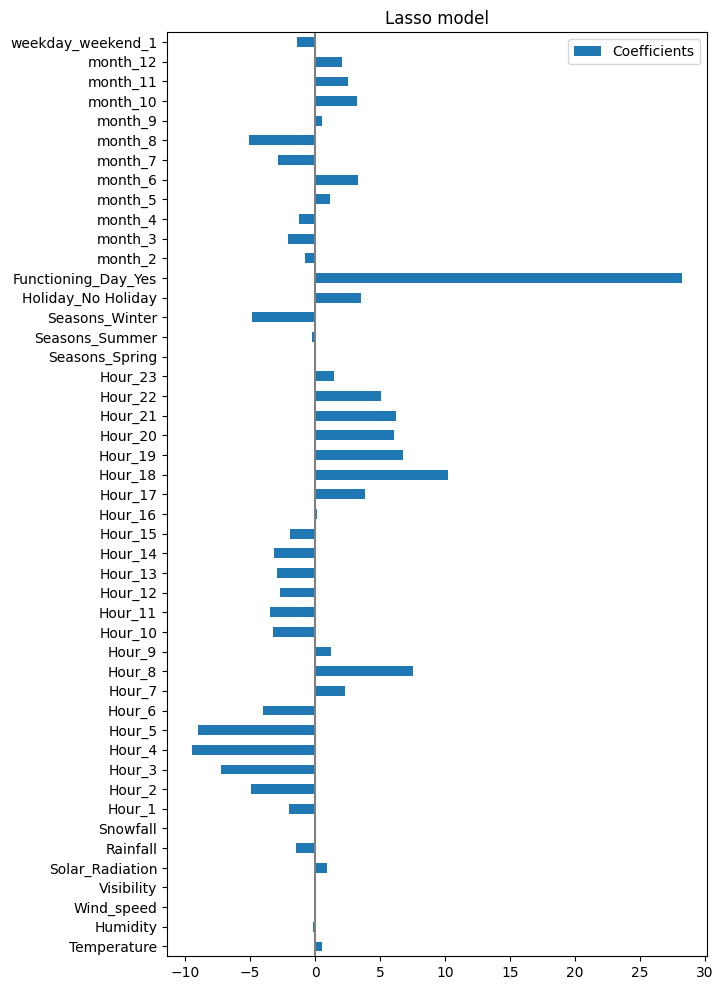

In [189]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

coefs = pd.DataFrame(
    lasso.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 12))
plt.title("Lasso model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

During our analysis, we began with exploratory data analysis (EDA) on all the features in our dataset. We first examined the dependent variable, 'Rented Bike Count,' and applied transformations as needed. Next, we analyzed categorical variables, removing any that predominantly contained a single class. We also investigated numerical variables, assessing their correlation, distribution, and relationship with the dependent variable. Some numerical features with mostly zero values were excluded, and we employed one-hot encoding for categorical variables.

Subsequently, we implemented three machine learning algorithms: Linear Regression, Lasso, and Ridge. We conducted hyperparameter tuning to enhance the performance of our models.

 * No overfitting is seen.

However, this is not the final destination. Since the data is time-dependent, variables such as temperature, windspeed, and solar radiation will not always exhibit consistency. Consequently, there may be instances where the model's performance could decline. Given that machine learning is a rapidly evolving field, it is essential to be prepared for various contingencies and continuously monitor our model over time. Therefore, possessing quality knowledge and staying updated with advancements in the ML landscape will undoubtedly help maintain a competitive edge in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***